# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [5]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
from    scipy.stats             import  ttest_1samp,ttest_ind, wilcoxon, ttest_ind_from_stats
import  scipy.stats             as      stats  
from    statsmodels.stats.power import  ttest_power
from random import sample

In [3]:
iris = pd.read_csv('iris.csv')

In [8]:
iris_sample = iris.sample(10)

In [10]:
iris_sample

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
150,151,5.9,NaN,NaN,NaN,Iris-virginica
65,66,6.7,3.1,4.4,1.4,Iris-versicolor
33,34,5.5,4.2,1.4,0.2,Iris-setosa
71,72,6.1,2.8,4.0,1.3,Iris-versicolor
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
14,15,5.8,4.0,1.2,0.2,Iris-setosa
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
130,131,7.4,2.8,6.1,1.9,Iris-virginica
35,36,5.0,3.2,1.2,0.2,Iris-setosa


## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [11]:
iris.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


Fill missing values with median of that particular column

In [26]:
iris.loc[:,'Id'].median()

76.5

In [29]:
#iris.loc[:,'Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'].median()
iris.median()

Id               76.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
dtype: float64

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [298]:
#Loading Pandas and Numpy
import pandas as pd
import numpy as np

In [299]:
#Reading File Laliga.csv and storing into dataframe bc2
bc2 = pd.read_csv('bc2.csv')

## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [300]:
#Printing the number of records in datasets and type of each column
bc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [301]:
#Printing Summary statistics
bc2.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Check Missing Values

In [302]:
#Checking number of missing values in each column
bc2.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [303]:
# Finding how many '?' are there in Bare Nuclei Feature
count_question = bc2['Bare Nuclei'].value_counts()['?']
print(count_question)

16


#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [304]:
# Finding top value
top_value = bc2['Bare Nuclei'].describe(include='all').top

In [305]:
#Printing top value
top_value

'1'

In [306]:
#Replacing ? with top value i.e. 1
bc2['Bare Nuclei'].replace("?",value=1,inplace=True)

In [307]:
#Printing values to check whether replacement is done or not
bc2['Bare Nuclei']

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
23      1
24      1
25      7
26      1
27      1
28      1
29      1
       ..
669     5
670     8
671     1
672     1
673     1
674     1
675     1
676     1
677     1
678     1
679     1
680    10
681    10
682     1
683     1
684     1
685     1
686     1
687     1
688     1
689     1
690     1
691     5
692     1
693     1
694     2
695     1
696     3
697     4
698     5
Name: Bare Nuclei, Length: 699, dtype: object

### Question 5
#### Find the distribution of target variable (Class) 

In [308]:
# Find the distribution of targe values(Class)
bc2['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

#### Plot the distribution of target variable using histogram

In [309]:
#Importing matplotlib
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029A4B65D518>]],
      dtype=object)

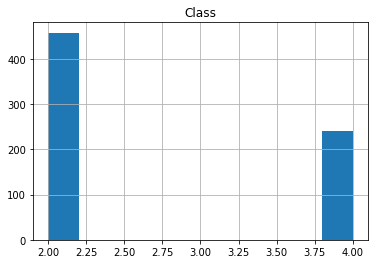

In [310]:
#Plotting histogram for Class column
bc2.hist(column='Class')

#### Convert the datatype of Bare Nuclei to `int`

In [311]:
#Checking datatye of Bare Nuclei
bc2['Bare Nuclei'].dtype

dtype('O')

In [312]:
#Changing datatype of Bare Nuclei to integar
bc2['Bare Nuclei']=bc2['Bare Nuclei'].astype(int)

## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

In [313]:
#Importing Seaboarn
import seaborn as sns

In [314]:
#Printing Scatter Matrix to understand the distribution of variables and check if any variables are collinear
bc2.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


In [315]:
#From Matrix it is visible that Cell Shape and Cell Size have high correlation, therefore dropping Cell Shape. 
#Also Column ID can be dropped as it doesn't have any significance as far as computation is concerned

bc2.drop(columns=['ID', 'Cell Shape'], inplace=True)

In [316]:
# Printing dataframe to check for cell drop
bc2

,ClumpThickness,Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,2,1,3,1,1,2
1,5,4,5,7,10,3,2,1,2
2,3,1,1,2,2,3,1,1,2
3,6,8,1,3,4,3,7,1,2
4,4,1,3,2,1,3,1,1,2
5,8,10,8,7,10,9,7,1,4
6,1,1,1,2,10,3,1,1,2
7,2,1,1,2,1,3,1,1,2
8,2,1,1,2,1,1,1,5,2
9,4,2,1,2,1,2,1,1,2


## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [317]:
#Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm

In [352]:
#Dividing datasets into feature set and target set. Class is target. Accordingly seprating it out
X = bc2.drop(columns='Class')
y = bc2.Class
print('X=',X.columns)
print('Y=',y.name)

X= Index(['ClumpThickness', 'Cell Size', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses'],
      dtype='object')
Y= Class


#### Divide the Training and Test sets in 70:30 

In [353]:
#Dividing dataset into Training and Test considering 70:30

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
knn=KNeighborsClassifier(n_neighbors=5)

## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [354]:
# Standardizing the data
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [355]:
#Building model, train and test on training for k=3,5,9
neighbors=[3,5,9]
accuracy_sc=np.empty(len(neighbors))
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,Y_train)
    ypred=knn.predict(scaledX_test)
    #Compute accuracy on the training set
    train_accuracy_plot[i] = knn.score(scaledX_train,Y_train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = knn.score(scaledX_test,Y_test)
    accuracy_sc[i] = accuracy_score(Y_test,ypred)
    print('Accuracy_Score considering k = ',k)
    print(accuracy_sc[i])

Accuracy_Score considering k =  3
0.9619047619047619
Accuracy_Score considering k =  5
0.9761904761904762
Accuracy_Score considering k =  9
0.9666666666666667


## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [356]:
#print(accuracy_sc.max())

In [357]:
# Finding Accuracy Considering k=1,3,5,......19. 

neighbors=np.arange(1,19,step=2)
accuracy_sc=np.empty(len(neighbors))
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,Y_train)
    ypred=knn.predict(scaledX_test)
    #Compute accuracy on the training set
    train_accuracy_plot[i] = knn.score(scaledX_train,Y_train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = knn.score(scaledX_test,Y_test)
    accuracy_sc[i] = accuracy_score(Y_test,ypred)
    print('Accuracy_Score considering k = ',k)
    print(accuracy_sc[i])

Accuracy_Score considering k =  1
0.9476190476190476
Accuracy_Score considering k =  3
0.9619047619047619
Accuracy_Score considering k =  5
0.9761904761904762
Accuracy_Score considering k =  7
0.9666666666666667
Accuracy_Score considering k =  9
0.9666666666666667
Accuracy_Score considering k =  11
0.9619047619047619
Accuracy_Score considering k =  13
0.9619047619047619
Accuracy_Score considering k =  15
0.9571428571428572
Accuracy_Score considering k =  17
0.9571428571428572


In [358]:
# Printing k with maximum accuracy
neighbors[np.where(accuracy_sc == np.amax(accuracy_sc))[0][0]]

5

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

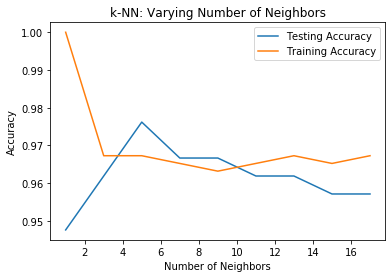

In [359]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()